In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics


In [5]:
df = pd.read_csv('HR.csv')
df.head()
# df.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
df.mean()


satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [7]:
df.round().mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1.0,1.0,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [9]:
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [10]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [11]:
df.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
# Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.
# Определите две самые скоррелированные и две наименеескоррелированные переменные.
data_quantative = df.filter(items = ['satisfaction_level', 'last_evaluation', 'number_project', 
                                     'average_montly_hours', 'time_spend_company'])
data_quantative
# sns.pairplot(df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [14]:
corr = data_quantative.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


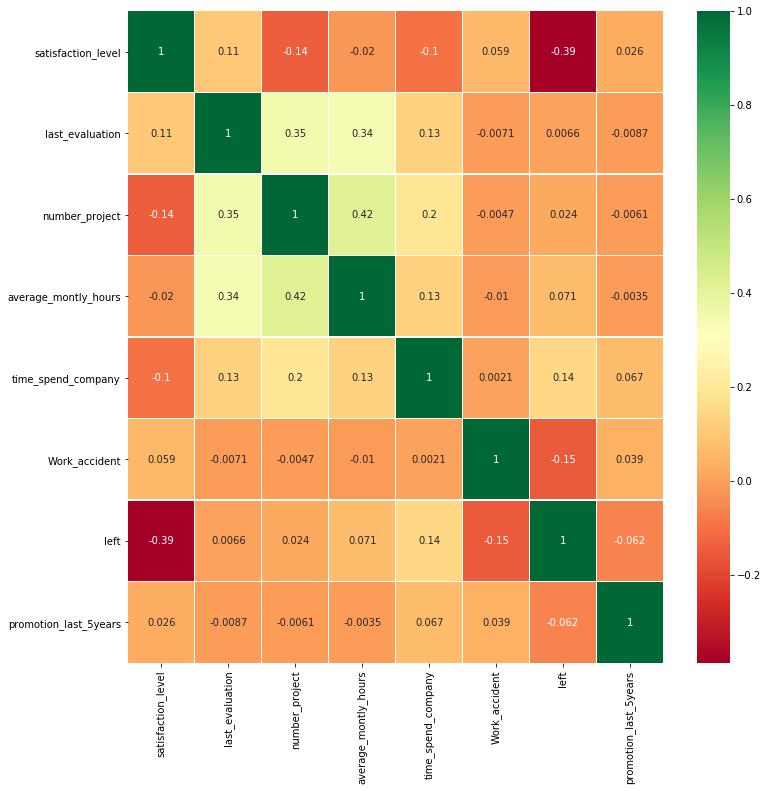

In [15]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


In [47]:
corr.min()

satisfaction_level     -0.142970
last_evaluation         0.105021
number_project         -0.142970
average_montly_hours   -0.020048
time_spend_company     -0.100866
dtype: float64

In [ ]:
# ответ: наименее скоррелированные переменные average_montly_hours и satisfaction_level, 
#     наиболее скоррелированные average_montly_hours и number_project 

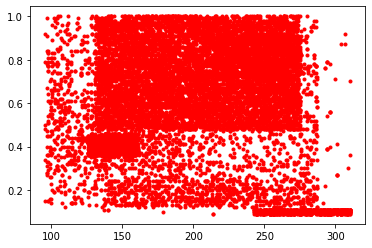

In [16]:
plt.plot(df.average_montly_hours, df.satisfaction_level, 'r.')
plt.show()

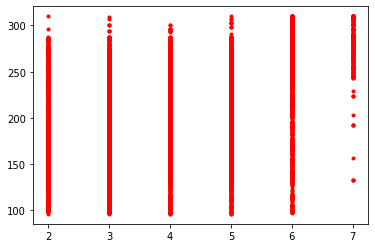

In [18]:
plt.plot(df.number_project,df.average_montly_hours, 'r.')
plt.show()

In [43]:
# Рассчитайте сколько сотрудников работает в каждомдепартаменте
# df.groupby('department').head()
df.groupby('department').count()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


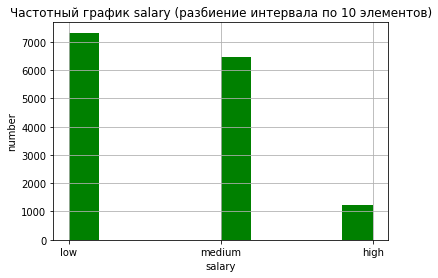

In [40]:
# Показать распределение сотрудников по зарплатам.
n, bins, patches = plt.hist(df['salary'], 10, facecolor='g')

plt.xlabel('salary')
plt.ylabel('number')
plt.title('Частотный график salary (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

большинство сотрудников работают на низкой зарплате

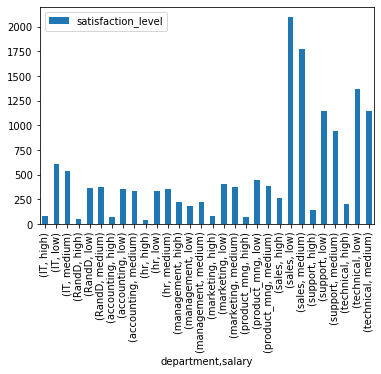

In [77]:
# Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности
data_salary = df.filter(items = ['department', 'salary', 'satisfaction_level'])
data_set = data_salary.groupby(['department', 'salary']).count().plot(kind='bar')
data_set


больше всего сотридников работают в департаменте сейлзов и техническом департаменте. примерное распределение высокий средних и низких зарплат в разрезе отделов одинаково. более точное процентное соотношение распределения зарплат нужно считать отдельно.

In [167]:
# Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

# from scipy.stats import spearmanr
# нулевая гипотеза- оиднаково проводят времени
from scipy import stats as st
alpha = 0.05
high_people = df[df['salary']=='high']['average_montly_hours']

low_people = df[data['salary']=='low']['average_montly_hours']

# result=stats.ttest_ind(high_people, low_people, equal_var= False)
# print (result)
# if (result.pvalue< alpha):
#     print ('отвергаем нулевую гипотезу, работают по разному')
# else:
#     print ('принимаем нулевую гипотезу')
    

In [165]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(high_people, 201.050337)  
# В качестве референтного значения берем медиану по показателю
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha): 
#     сравниваем выборки по одностороннему критерию, так как нас волнует только превышение
    print('Отвергаем нулевую гипотезу, среднее меньше 200')
else:
    print('Не отвергаем нулевую нулевую гипотезу,  в среднем больше 200 часов работают люди с высокой зарплатой')

Ttest_1sampResult(statistic=-0.8720175334567494, pvalue=0.38336816845093036)
Не отвергаем нулевую нулевую гипотезу,  в среднем больше 200 часов работают люди с высокой зарплатой


In [166]:
alpha = 0.05
result = st.ttest_1samp(low_people, 201.050337)

if (result.statistic > 0) & (result.pvalue / 2 < alpha):
#     берем односторонний критерий,так как нас волнует только значения меньше медианы
    print('Отвергаем нулевую гипотезу, среднее больше 200')
else:
    print('Не отвергаем нулевую гипотезу, люди с низкой зарплатой работают меньше')

Не отвергаем нулевую гипотезу, люди с низкой зарплатой работают меньше


In [109]:
# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)
# Доля сотрудников с повышением за последние 5 лет
# ●Средняя степень удовлетворенности
# ●Среднее количество проектов

results = df.groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean', 
                                  'promotion_last_5years': ['sum','count']})
# results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()
aaa= df.groupby('left').agg(['sum', 'count'])['promotion_last_5years'].head()

results['value of achivement']= aaa['sum']/aaa['count']
results.head()


satisfaction_level number_project promotion_last_5years         \
                   mean           mean                   sum  count   
left                                                                  
0              0.666810       3.786664                   300  11428   
1              0.440098       3.855503                    19   3571   

     value of achivement  
                          
left                      
0               0.026251  
1               0.005321

In [ ]:
# Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, 
# предсказывающую уволился лисотрудник на основе имеющихся факторов
# (кроме department иsalary)Оценить качество модели на тестовой выборки



In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2)
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
13375,0.91,0.68,4,132,4,0,0,0,IT,medium
9254,0.64,0.48,4,267,2,1,0,0,sales,low
6821,0.71,0.77,3,193,3,1,0,0,accounting,low
9795,0.57,0.59,4,197,3,0,0,0,sales,low
9685,0.56,0.47,5,185,4,0,0,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
2594,0.99,0.72,3,119,2,1,0,0,marketing,low
4711,0.73,0.50,4,224,4,1,0,0,support,low
6206,0.48,0.84,3,146,2,1,0,0,sales,medium
4676,0.97,0.79,2,272,2,0,0,0,sales,medium


In [27]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
7022,0.85,0.99,3,201,3,0,0,0,RandD,medium
2646,0.78,0.89,3,253,3,0,0,0,support,high
4729,0.60,0.90,4,178,3,0,0,1,RandD,high
14888,0.39,0.49,2,142,3,0,1,0,sales,low
2901,0.50,0.70,3,274,3,0,0,0,marketing,low
...,...,...,...,...,...,...,...,...,...,...
5253,0.95,0.78,2,148,2,0,0,0,IT,low
3278,0.78,0.98,4,239,3,0,0,0,RandD,medium
2053,0.41,0.68,3,165,3,1,0,0,product_mng,medium
10563,0.67,0.61,4,145,4,0,0,0,hr,low


In [28]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']
del data_train['department']
del data_test['department']
del data_train['salary']
del data_test['salary']


In [29]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
13375,0.91,0.68,4,132,4,0,0
9254,0.64,0.48,4,267,2,1,0
6821,0.71,0.77,3,193,3,1,0
9795,0.57,0.59,4,197,3,0,0
9685,0.56,0.47,5,185,4,0,0
...,...,...,...,...,...,...,...
2594,0.99,0.72,3,119,2,1,0
4711,0.73,0.50,4,224,4,1,0
6206,0.48,0.84,3,146,2,1,0
4676,0.97,0.79,2,272,2,0,0


In [30]:
lda = LinearDiscriminantAnalysis()

In [31]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [34]:
lda.coef_

array([[-4.52483237e+00,  6.67354298e-01, -2.22626693e-01,
         4.33353311e-03,  2.36099657e-01, -1.03004744e+00,
        -1.19457993e+00]])

In [35]:
import sklearn 
sklearn.metrics.accuracy_score(y_test, lda.predict(data_test), normalize=True, sample_weight=None)

0.757

точность предсказания 75%